<a href="https://colab.research.google.com/github/racoope70/customer-loan-prediction/blob/main/Regression_Customer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#load and explore data
import pandas as pd
from google.colab import drive  # Corrected import statement


drive.mount('/content/drive')


file_path = '/content/drive/MyDrive/Bank_Personal_Loan_Modelling.csv'


df = pd.read_csv(file_path)


df.head()


Mounted at /content/drive


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
# Step 1: Check for anomalies and clean the data


negative_experience = df[df['Experience'] < 0]


experience_median = df['Experience'].median()
df.loc[df['Experience'] < 0, 'Experience'] = experience_median


cleaned_negative_experience = df[df['Experience'] < 0]


df_cleaned = df.drop(columns=['ID', 'ZIP Code'])

# Display summary of cleaned data
df_cleaned.info(), cleaned_negative_experience.empty


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


(None, True)

In [ ]:
df_cleaned.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


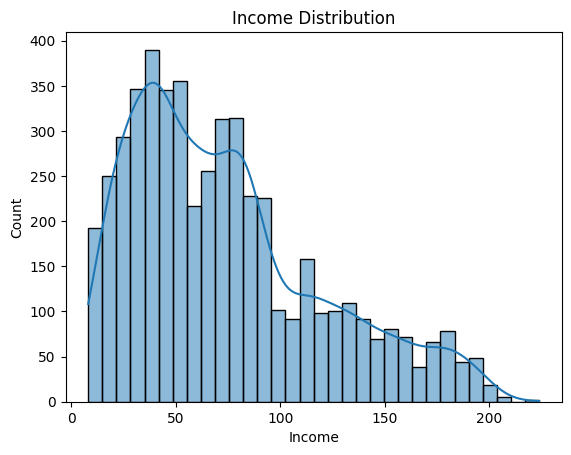

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of income
sns.histplot(df['Income'], kde=True)
plt.title('Income Distribution')
plt.show()



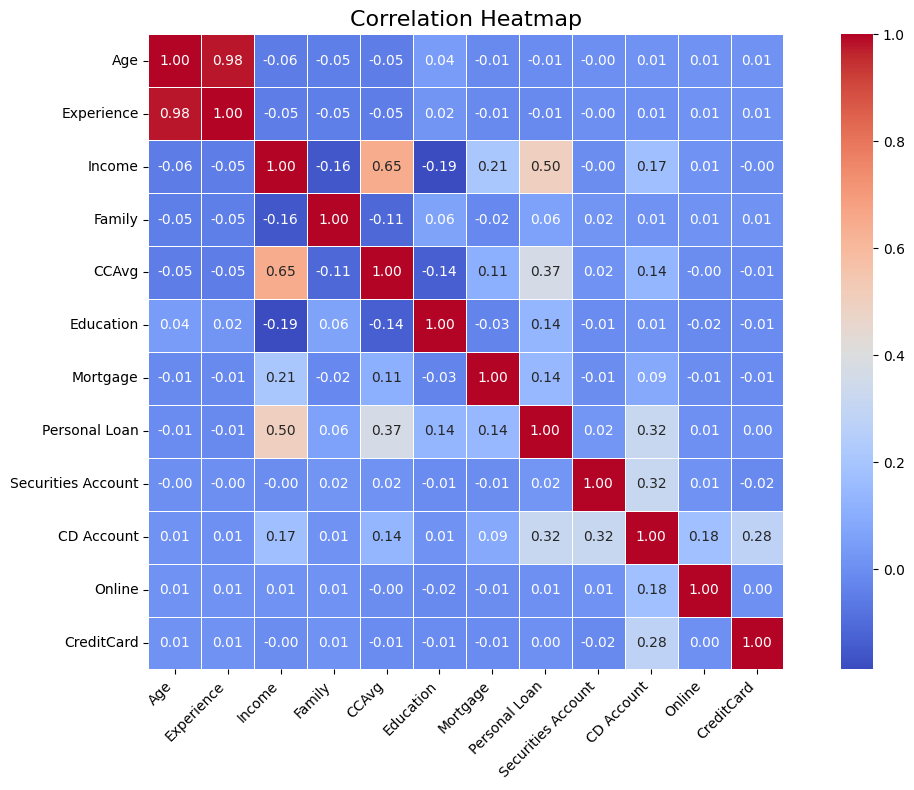

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_matrix = df_cleaned.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(
    corr_matrix,
    annot=True,                # Display the correlation values
    fmt=".2f",                 # Limit to 2 decimal places
    cmap="coolwarm",           # Divergent colormap
    linewidths=0.5,            # Separate cells with lines
    cbar=True,                 # Add color bar
    square=True                # Ensure square cells
)

# Title and layout adjustments
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)              # Keep y-axis labels horizontal
plt.tight_layout()

# Show the heatmap
plt.show()


In [ ]:
#Feature Engineering
df_cleaned['Debt_to_Income'] = df_cleaned['Personal Loan'] / df_cleaned['Income']


In [ ]:
#Split and train data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

X = df_cleaned[['Age', 'Income', 'Education', 'CCAvg', 'CD Account', 'Securities Account']]
y=df_cleaned['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
 # Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

R2 Score: 0.7720202892089675
MSE: 0.021364333333333336


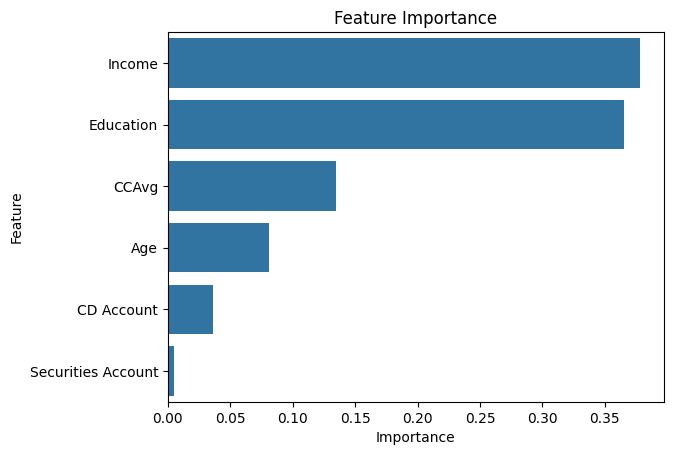

In [ ]:
# Feature importance
importance = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


In [ ]:
#Split and train data with non improtant feature (security account)

X = df_cleaned[['Age', 'Income', 'Education', 'CCAvg', 'CD Account']]
y=df_cleaned['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

 # Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

R2 Score: 0.7740669951766888
MSE: 0.021172533333333333


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best R² Score: 0.713077254627224


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, cv=5, n_iter=50, scoring='r2', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best R² Score:", random_search.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 178}
Best R² Score: 0.7121849714072893


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train a model on the balanced dataset
model_smote = RandomForestRegressor(random_state=42)
model_smote.fit(X_train_smote, y_train_smote)

# Evaluate
y_pred_smote = model_smote.predict(X_test_smote)
print("R² Score (SMOTE):", r2_score(y_test_smote, y_pred_smote))
print("MSE (SMOTE):", mean_squared_error(y_test_smote, y_pred_smote))


R² Score (SMOTE): 0.9383993236151984
MSE (SMOTE): 0.015394063421828908


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='r2')
print(f"Cross-Validated R² Scores: {scores}")
print(f"Mean Cross-Validated R²: {scores.mean()}")


Cross-Validated R² Scores: [0.75691134 0.69253008 0.92153776 0.         0.        ]
Mean Cross-Validated R²: 0.47419583584485564


In [ ]:
from collections import Counter
print("Class Distribution After SMOTE:", Counter(y_resampled))


Class Distribution After SMOTE: Counter({0: 4520, 1: 4520})


In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_resampled, y_resampled, cv=skf, scoring='r2')
print(f"Stratified Cross-Validated R² Scores: {scores}")
print(f"Mean Stratified R²: {scores.mean()}")


Stratified Cross-Validated R² Scores: [0.95286853 0.94477876 0.9218697  0.92212721 0.92575149]
Mean Stratified R²: 0.9334791399950836


In [ ]:
model.fit(X_resampled, y_resampled)

RandomForestRegressor(random_state=42)

In [ ]:
# Evaluate on the original test set
y_pred_original = model.predict(X_test)
print(f"R² Score (Original Test Data): {r2_score(y_test, y_pred_original)}")
print(f"MSE (Original Test Data): {mean_squared_error(y_test, y_pred_original)}")


R² Score (Original Test Data): 0.9739049239747499
MSE (Original Test Data): 0.002445410166666667


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Convert probabilities to binary predictions
y_pred_class = (y_pred_original > 0.5).astype(int)

# Compute metrics
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
auc = roc_auc_score(y_test, y_pred_original)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")


Precision: 0.99
Recall: 1.00
F1-Score: 1.00
AUC: 1.00


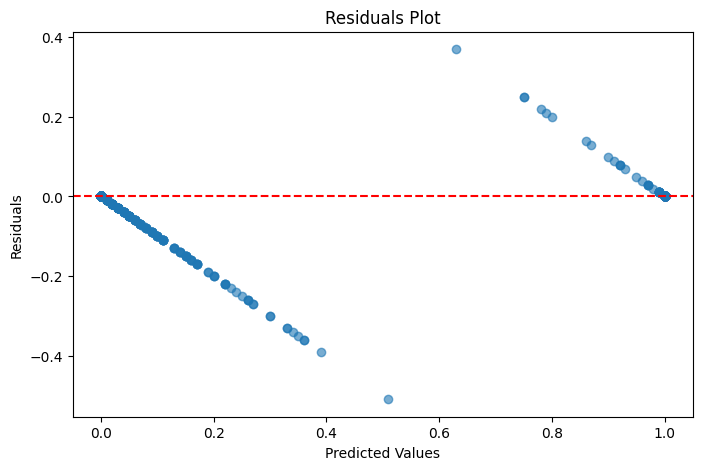

In [ ]:
residuals = y_test - y_pred_original
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_original, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


In [ ]:
import joblib

# Save the model to Google Drive
joblib.dump(model, '/content/drive/MyDrive/final_model.pkl')



['/content/drive/MyDrive/final_model.pkl']

In [ ]:
!ls /content/drive/MyDrive

 500hits.csv
 aclImdb
 aclImdb_reviews.csv
'Assignment 9: Fraction Data.gsheet'
'Average NBA Ticket Price .gsheet'
 ax.gsheet
'Back of State ID.jpg'
 Bank_Personal_Loan_Modelling.csv
 best_xgboost_model.pkl
'budget 2012 (1).gsheet'
'budget 2012.gsheet'
'Car Value Over Time.gsheet'
 Cleaned_2018_Financial_Data.xls
 cleaned_creditcard_data.csv
'Cleveland Cavaliers from 2018 - 1971.gsheet'
'Cleveland Cavaliers Season from 2018 - 1971 (1).gsheet'
'Cleveland Cavaliers Season from 2018 - 1971.gsheet'
'Code changes.docx'
'Colab Notebooks'
 College.Rating.gsheet
'Copy of Bank_Personal_Loan_Modelling (1).csv'
'Copy of Bank_Personal_Loan_Modelling.csv'
'Copy of NYSE Data Project Submission Template.gslides'
 creditcard.csv
'EDA Final Assignment updated.gsheet'
'EDA Final.gsheet'
'EDA Final Project (1).gslides'
'EDA Final Project.gslides'
 final_model.pkl
'Front of State ID.jpg'
 IMG_3144.jpeg
'Largest banks in the United States.gsheet'
'Life Expectation per location.gsheet'
'Most 3 pointers made

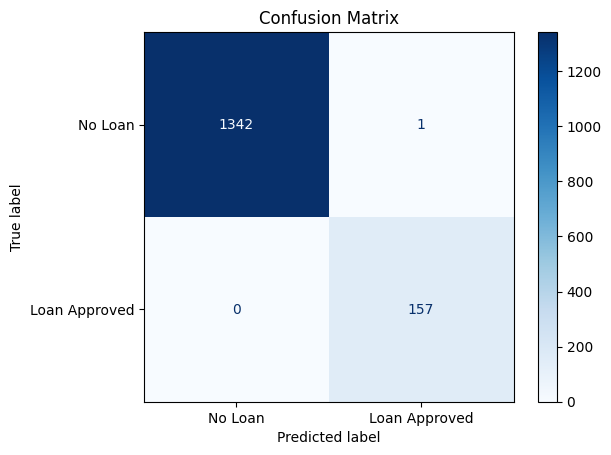

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

# Display the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Loan', 'Loan Approved'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


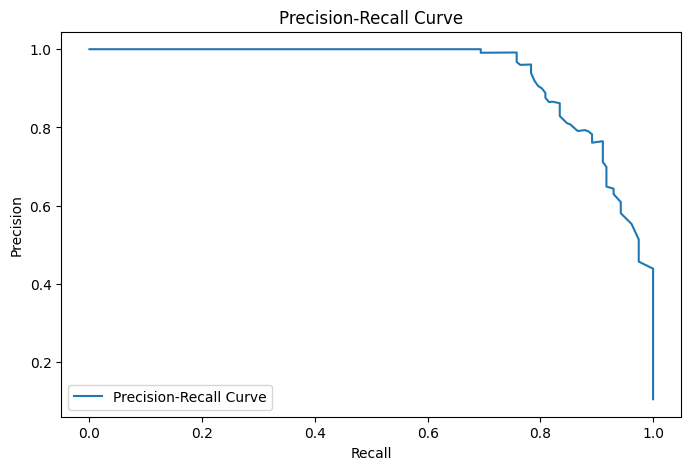

In [ ]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot the precision-recall curve
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


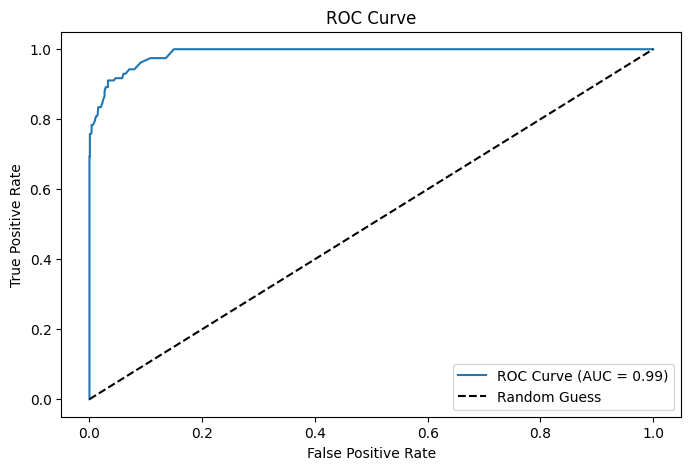

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


<ipython-input-43-9d119d97fcf2>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Class 0 (Original)', 'Class 1 (Original)', 'Class 0 (SMOTE)', 'Class 1 (SMOTE)'],


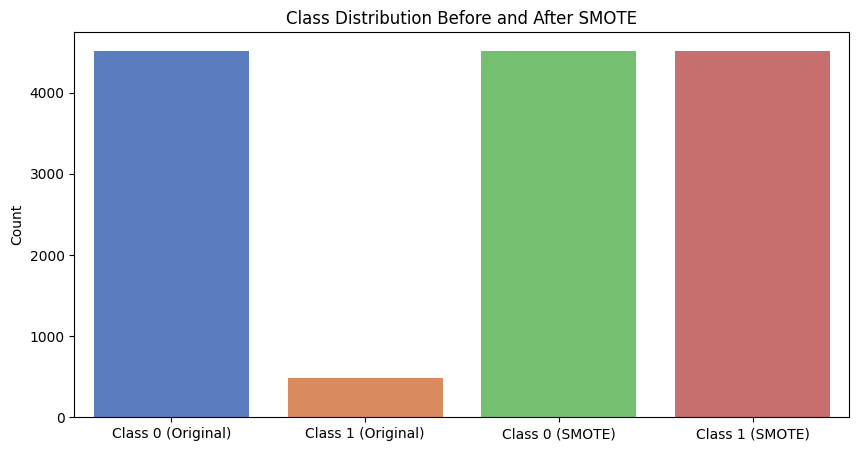

In [ ]:
from collections import Counter
import seaborn as sns

# Class distributions
original_counts = Counter(y)
smote_counts = Counter(y_resampled)

# Bar plot for class distributions
plt.figure(figsize=(10, 5))
sns.barplot(x=['Class 0 (Original)', 'Class 1 (Original)', 'Class 0 (SMOTE)', 'Class 1 (SMOTE)'],
            y=[original_counts[0], original_counts[1], smote_counts[0], smote_counts[1]],
            palette='muted')
plt.title('Class Distribution Before and After SMOTE')
plt.ylabel('Count')
plt.show()
